ANN

1~5번까지 CNN 내용 같음

In [1]:
import glob
base_path = './xray_classification_pneumonia/Dataset_compressed/train'
file_path = list(glob.glob(base_path + "/*/*.*"))
pneumonia = list(glob.glob(base_path+"/PNEUMONIA/*.*"))
normal = list(glob.glob(base_path+"/NORMAL/*.*"))

In [2]:
label_name = {
    0: 'normal',
    1: 'pneumonia'
}

In [3]:
len(pneumonia), len(normal)

(3875, 1341)

In [4]:
import matplotlib.pyplot as plt
import os
test = os.path.dirname(file_path[0])
print(test)
class_name = os.path.split(os.path.dirname(test))
print(class_name)

./xray_classification_pneumonia/Dataset_compressed/train\NORMAL
('./xray_classification_pneumonia/Dataset_compressed', 'train')


In [5]:
labels = []
for fp in file_path:
    tmp = os.path.dirname(fp)
    class_name = os.path.split(tmp)
    if class_name[1] == "PNEUMONIA":
        labels.append(1)
    else:
        labels.append(0)

In [6]:
import numpy as np
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2

img_width = 60 # size 고정
img_height = 60

dataset = np.ndarray(shape=(len(file_path), img_height*img_width), dtype=np.float32)  # array로 바꿈
i=0
for _file in file_path:
    img = cv2.imread(_file, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (img_width, img_height))
    
    dataset[i] = img_resized.flatten()
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
Done!


CNN 내용 여기까지

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)

In [9]:
len(x_train), len(x_test), len(y_train), len(y_test)

(4172, 1044, 4172, 1044)

모델 생성

In [10]:
y_train, y_test = map(lambda x: to_categorical(x), [y_train, y_test])

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [12]:
def build():
    model = Sequential()
    model.add(Dense(100, activation = 'relu', input_shape = (3600,)))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(2, activation = 'softmax'))
    return model

model = build()
model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │       360,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,252 (1.39 MB)

 Trainable params: 365,252 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.predict(dataset)

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step


array([[3.6407986e-13, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 1.4969373e-08],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.6566312e-33]], dtype=float32)

adam 학습

In [14]:
model_adam = build()
model_adam.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss= 'categorical_crossentropy', metrics=['accuracy'])
history = model_adam.fit(
    x_train, y_train, validation_data = (x_test, y_test), batch_size = 64, epochs = 20
)

Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6827 - loss: 80.7042 - val_accuracy: 0.8966 - val_loss: 3.4211
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9173 - loss: 1.9110 - val_accuracy: 0.8487 - val_loss: 3.3680
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8922 - loss: 2.9329 - val_accuracy: 0.6437 - val_loss: 16.2370
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 6.2167 - val_accuracy: 0.9454 - val_loss: 1.6711
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9517 - loss: 1.3525 - val_accuracy: 0.9090 - val_loss: 2.8768
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9001 - loss: 3.1835 - val_accuracy: 0.9416 - val_loss: 1.5498
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9470 - loss: 1.1930 - val_accuracy: 0.9349 - val_loss: 1.6147
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9437 - loss: 1.0673 - val_accuracy: 0.9377 - val_los

예측

In [15]:
import matplotlib.pyplot as plt
import numpy as np
prediction = model_adam.predict(x_test)

predicted_class= np.argmax(prediction, axis= 1)
True_classes = np.argmax(y_test, axis=1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


정확도 계산

In [16]:
accuracy = np.mean(predicted_class == True_classes)
print(f'accuracy: {accuracy * 100:.2f}%')

accuracy: 94.54%


시각화

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

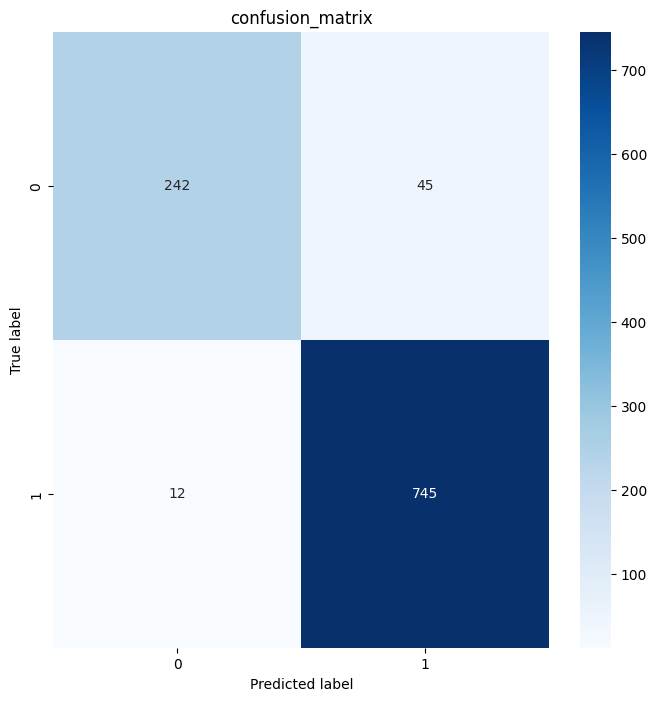

In [18]:
conf_matrix = confusion_matrix(True_classes, predicted_class)
plt.figure(figsize=(8,8))

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap= 'Blues')
plt.title('confusion_matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

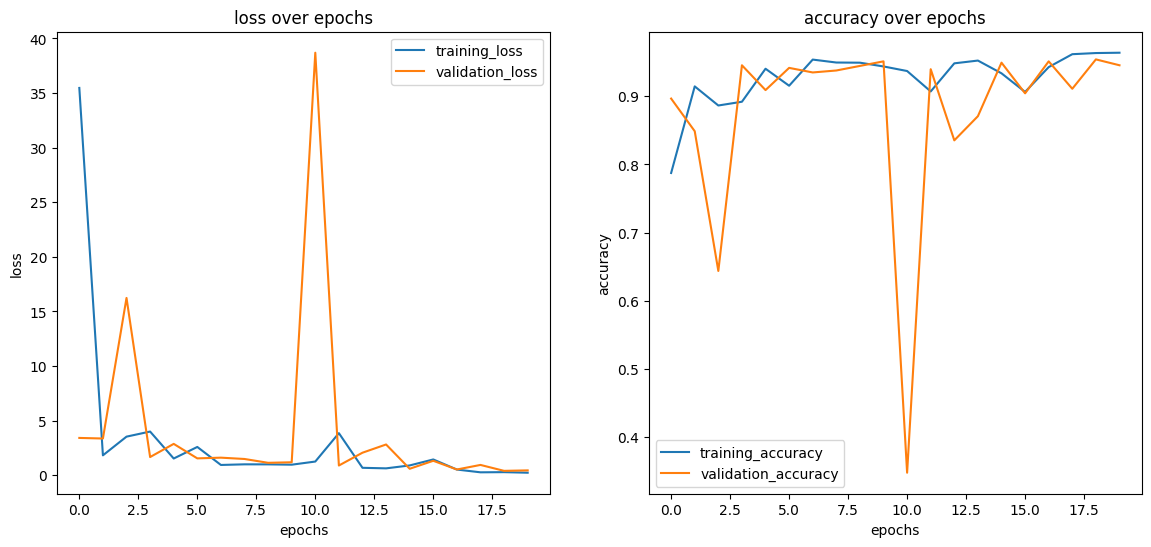

In [19]:
# train, val 시각화 - loss로 그래프 그림
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.title('loss over epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.title('accuracy over epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

CNN

In [20]:
# ANN의 1번에서 5번까지 같은 내용

In [21]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
image_width = 60
image_height = 60
channels = 3
dataset = np.ndarray(shape=(len(file_path), image_height, image_width, channels),dtype=np.float32)
i=0
for _file in file_path:
    img = load_img(_file)
    img.thumbnail((image_width, image_height))
    x = img_to_array(img)
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
Done!


데이터 시각화

In [22]:
import cv2

im0 = cv2.imread(pneumonia[67])
im1 = cv2.imread(normal[67])

im0.shape, im1.shape

((60, 60, 3), (60, 60, 3))

(-0.5, 59.5, 59.5, -0.5)

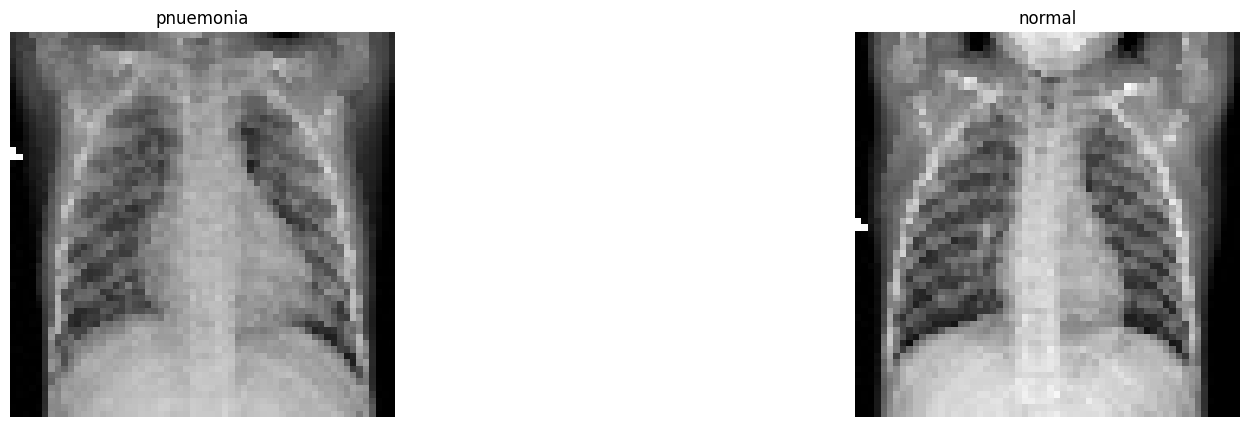

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('pnuemonia')
plt.imshow(im0)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('normal')
plt.imshow(im1)
plt.axis('off')

In [24]:
# Train, val test detaset

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train1, x_test1, y_train1,y_test1 = train_test_split(dataset, labels, test_size=0.2, random_state=321)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)
y_train1, y_test1, y_val1 = to_categorical(y_train1), to_categorical(y_test1), to_categorical(y_val1)

# preprocess 전처리 - normalization->/255

x_train1 = x_train1.astype('float32')/255.
x_test1 = x_test1.astype('float32')/255.
x_val1 = x_val1.astype('float32')/255.

In [25]:
x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape, x_val1.shape, y_val1.shape

((4172, 60, 60, 3),
 (4172, 2),
 (522, 60, 60, 3),
 (522, 2),
 (522, 60, 60, 3),
 (522, 2))

CNN 생성

In [26]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

In [27]:
# Vanilla CNN -> 기본 틀의 CNN

# Vanilla CNN
def build():
    CNN = Sequential()
    CNN.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(60, 60, 3)))
    CNN.add(MaxPooling2D(pool_size=(2, 2)))
    CNN.add(Conv2D(64, (3, 3), padding='same', activation='relu',))
    CNN.add(MaxPooling2D(pool_size=(2, 2)))
    CNN.add(Flatten())
    CNN.add(Dense(1000, activation='relu'))
    CNN.add(Dense(500, activation='relu'))
    CNN.add(Dense(2, activation='softmax'))
    return CNN


In [28]:
# metric function
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (possible_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [29]:
BATCH_SIZE = 32

학습

In [30]:
CNN_Adam = build()

opt = optimizers.Adam(learning_rate=0.001)
CNN_Adam.compile(
    optimizer = opt,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 
               recall_m, 
               precision_m, 
               f1_m]    
)

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
epochs = 5
history = CNN_Adam.fit(
    x_train1,
    y_train1,
    validation_data = (x_val1,y_val1),
    epochs=epochs,
    batch_size = BATCH_SIZE
)

Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.8047 - f1_m: 0.8047 - loss: 0.4838 - precision_m: 0.8047 - recall_m: 0.8047 - val_accuracy: 0.9080 - val_f1_m: 0.9077 - val_loss: 0.2412 - val_precision_m: 0.9077 - val_recall_m: 0.9077
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9508 - f1_m: 0.9508 - loss: 0.1370 - precision_m: 0.9508 - recall_m: 0.9508 - val_accuracy: 0.9617 - val_f1_m: 0.9632 - val_loss: 0.1062 - val_precision_m: 0.9632 - val_recall_m: 0.9632
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9662 - f1_m: 0.9662 - loss: 0.0853 - precision_m: 0.9662 - recall_m: 0.9662 - val_accuracy: 0.9674 - val_f1_m: 0.9688 - val_loss: 0.0868 - val_precision_m: 0.9688 - val_recall_m: 0.9688
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9734 - f1_m: 0.9734 - loss: 0.0687 - precision_m: 0.9734 - recall_m: 0.9734 - val_accuracy: 0.9636 - val_f1_m: 0.9651 - val_loss: 0.1090 - val_precision_m: 0.9651 - val_recal

테스트

In [32]:
score = CNN_Adam.evaluate(x_test1, y_test1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9771 - f1_m: 0.9772 - loss: 0.0824 - precision_m: 0.9772 - recall_m: 0.9772


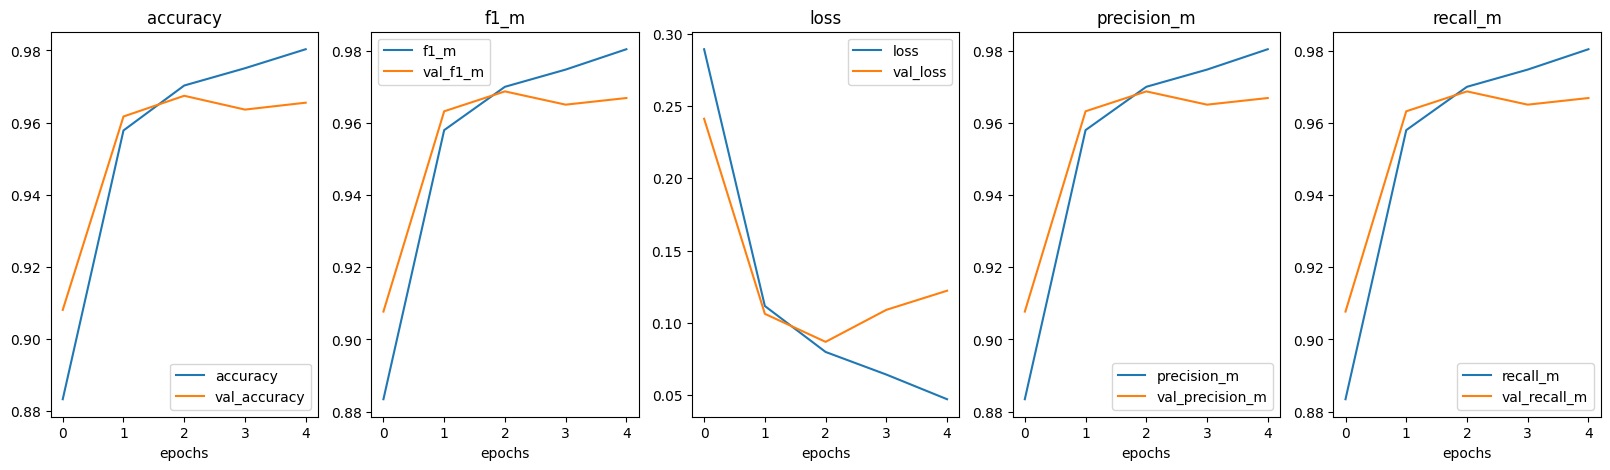

In [33]:
# 시각화
plt.figure(figsize=(20,5))
for i, key in enumerate(list(history.history.keys())[:5]):
    plt.subplot(1,5,i+1)
    plt.title(key)
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel('epochs')
    plt.legend([key,'val_'+key])
plt.show()

예측

In [34]:
y_pred = CNN_Adam.predict(x_test1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [35]:
y_pred_argmax = np.argmax(np.array(y_pred), axis=1)
y_pred_argmax

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [36]:
# 예측결과 시각화
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test1.argmax(-1), y_pred_argmax))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       128
           1       0.97      0.99      0.98       394

    accuracy                           0.97       522
   macro avg       0.97      0.95      0.96       522
weighted avg       0.97      0.97      0.97       522



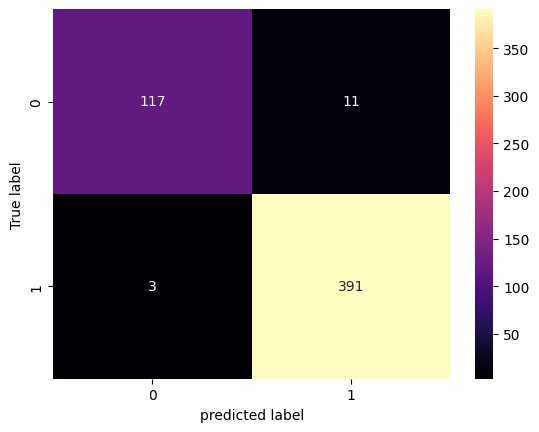

In [37]:
import seaborn as sns
heatmap = sns.heatmap(confusion_matrix(y_test1.argmax(-1),y_pred_argmax), annot=True, fmt='.3g',xticklabels=['0','1'],yticklabels=['0','1'], cmap = 'magma')
heatmap.set_xlabel('predicted label')
heatmap.set_ylabel('True label')
plt.show()

Inference

In [38]:
# inference 이미지 9개의 랜덤 추출
idx = np.random.randint(0,len(x_test1),9)

In [39]:
import matplotlib.pyplot as plt
target_x, target_y = x_test1[idx], y_test[idx]
predictions = CNN_Adam.predict(target_x)
predictions = predictions.argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


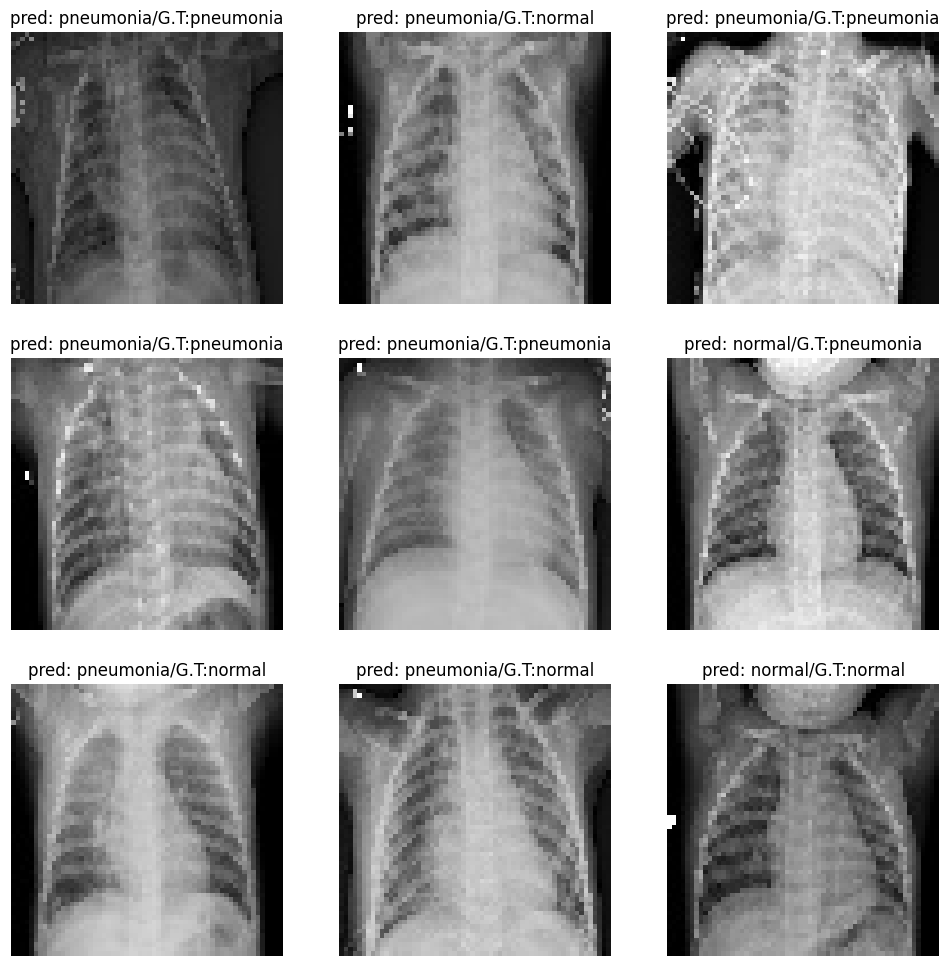

In [40]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    pred = label_name[predictions[i]]
    gth = label_name[y_test[i].argmax()]
    
    plt.title(f'pred: {pred}/G.T:{gth}')
    plt.imshow(target_x[i])
    plt.axis('off')
    

plt.show()

CNN with pytorch

In [91]:
import torch

In [92]:
import torchvision
import torchvision.transforms as transforms

In [43]:
from torch.hub import load_state_dict_from_url

In [44]:
import torch.nn as nn

In [45]:
import torch
# tensor 생성
x = torch.tensor([1., 2., 3.])
print(x)
if torch.cuda.is_available():
    x = x.to('cuda')
    print(x)
else:
    print('unable!')

tensor([1., 2., 3.])
unable!


In [46]:
# 전처리 과정
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])
# 데이터셋 로딩
train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

In [47]:
import torch.utils


train = torchvision.datasets.MNIST(root = './data', train = True, download = True,transform=transform )
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)


test = torchvision.datasets.MNIST(root = './data', train = True, download = True, transform=transform)
test_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=False)

In [48]:
import torchvision
import torchvision.transforms as transforms

In [66]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5) # 1: 입력채널, 6: 출력 채널, 5: 커널(필터) 크기
        self.pool = nn.MaxPool2d(2,2) # 2: 커널 크기, 스트라이드(보폭)
        self.conv2 = nn.Conv2d(6,16,5) # 6: 입력채널, 16, 출력채널, 5: 커널 크기
        self.fc1 = nn.Linear(16*4*4, 120) #16*4*4
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16*4*4) #flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
        

모델 생성

In [88]:
import torch

In [78]:
import sys
sys.setrecursionlimit(10**7)

In [84]:
torch.cuda.is_available()

False

In [85]:
net = SimpleCNN().to('cpu')

In [86]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01)

In [87]:
num_epochs = 5
train_val_loss = []
val_loss_values = []
for epoch in range(num_epochs):
    running_loss = 0.0
    net.train() # 모델을 학습 모델로 변경
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        # inputs, labels = inputs.to('cpu'), labels.to('cpu')
        optimizer.zero_grad() # 모든 변화율(gradient)을 0으로 초기화
        outputs = net(inputs) # 순전파
        loss = criterion(outputs, labels) # 손실 함수 계산
        loss.backward() # 역전파
        optimizer.step() # 변화율을 사용하여 가중치 업데이트
        running_loss += loss.item()
        if i % 100 == 99: # 100번째 미니배치마다 손실 출력
            train_val_loss.append(running_loss / 100)
            print(f"Epoch {epoch+1}, Batch {i+1}: Train Loss: {running_loss / 100}")
            running_loss = 0.0
            
    # 검증 손실 계산
    net.eval() # 모델을 평가 모델로 변경
    val_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            # inputs, labels = inputs.to('cuda'), labels.to('cuda')
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(test_loader)
    val_loss_values.append(val_loss)
    print(f"Epoch {epoch+1}: Validation Loss: {val_loss}")
print('Finish!')

Epoch 1, Batch 100: Train Loss: 0.5010854396224022
Epoch 1, Batch 200: Train Loss: 0.16659151237457992
Epoch 1, Batch 300: Train Loss: 0.14839190831407906
Epoch 1, Batch 400: Train Loss: 0.140005804579705
Epoch 1, Batch 500: Train Loss: 0.11677092903293669
Epoch 1, Batch 600: Train Loss: 0.12035537723917514
Epoch 1, Batch 700: Train Loss: 0.11647770929615944
Epoch 1, Batch 800: Train Loss: 0.0969485880760476
Epoch 1, Batch 900: Train Loss: 0.09627513760467991
Epoch 1: Validation Loss: 0.11844313839588985
Epoch 2, Batch 100: Train Loss: 0.10563427517190575
Epoch 2, Batch 200: Train Loss: 0.0707639323384501
Epoch 2, Batch 300: Train Loss: 0.11203830205835402
Epoch 2, Batch 400: Train Loss: 0.0935824740328826
Epoch 2, Batch 500: Train Loss: 0.07882766676222673
Epoch 2, Batch 600: Train Loss: 0.09505019998876378
Epoch 2, Batch 700: Train Loss: 0.09948030587751418
Epoch 2, Batch 800: Train Loss: 0.10286001920234412
Epoch 2, Batch 900: Train Loss: 0.08571459154132753
Epoch 2: Validation Loss

In [89]:
import matplotlib.pyplot as plt

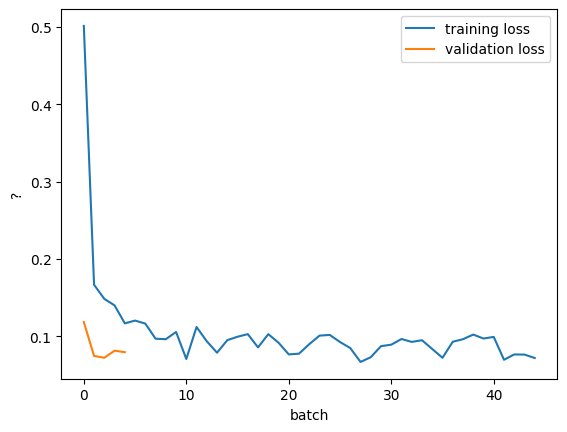

In [93]:
plt.plot(train_val_loss, label = 'training loss')
plt.plot(val_loss_values, label = 'validation loss')
plt.xlabel('batch')
plt.ylabel('?')
plt.legend()
plt.show()

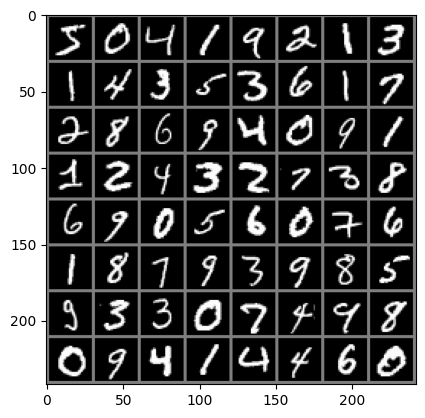

predicted:  5 0 4 1 9 2 1 3
ground truth:  5 0 4 1 9 2 1 3


In [90]:
def imshow(img):
    img = img / 2+0.5 #역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
# 테스트 데이터 예측 
dataiter = iter(test_loader)
images, labels = next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images))

# 예측 출력
# images, labels = images.to('cuda'), labels.to('cuda')
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# 예측 결과와 실제 레이블 출력
print('predicted: ', ' '.join(f'{predicted[j].item()}' for j in range(8)))
print('ground truth: ', ' '.join(f'{labels[j].item()}' for j in range(8)))